# Analysing customer churn problem in the Telecom industry using pyspark


### Data Source
"Churn.csv"

### Import Libraries

In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Q1. Read the data Churn.csv into pyspark.

In [2]:
ss = SparkSession.builder.appName('Churn_data').config(conf = SparkConf()).getOrCreate()

In [3]:
df = ss.read.csv('Churn.csv', header=True, inferSchema=True)
type(df)

pyspark.sql.dataframe.DataFrame

In [4]:
#To view the schema of the dataframe

df.printSchema()

root
 |-- Account Length: integer (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Intl Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [5]:
# No of rows in the dataframe

df.count()

3333

In [6]:
# No. of columns(variables) in the dataframe

len(df.columns)

21

In [7]:
df.dropDuplicates().show()

+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|Account Length|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Churn|Intl Plan|VMail Plan|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|State|Area Code|   Phone|
+--------------+-------------+--------+--------+----------+---------+--------------+-----+---------+----------+---------+----------+---------+----------+-----------+------------+----------+-----------+-----+---------+--------+
|           137|            0|   206.4|   128.0|     194.5|      8.8|             2|    0|        0|         0|      122|     35.09|      102|     10.88|         84|        8.75|         5|       2.38|   MI|      510|355-9508|
|           121|            0|   170.4|   350.5|     297.0|     11.2|             0|    1|  

In [8]:
# Drop null rows if any and count the total number of rows in output DataFrame

df.dropna().count()

3333

In [9]:
df.head(5)

[Row(Account Length=128, VMail Message=25, Day Mins=265.1, Eve Mins=197.4, Night Mins=244.7, Intl Mins=10.0, CustServ Calls=1, Churn=0, Intl Plan=0, VMail Plan=1, Day Calls=110, Day Charge=45.07, Eve Calls=99, Eve Charge=16.78, Night Calls=91, Night Charge=11.01, Intl Calls=3, Intl Charge=2.7, State=u'KS', Area Code=415, Phone=u'382-4657'),
 Row(Account Length=107, VMail Message=26, Day Mins=161.6, Eve Mins=195.5, Night Mins=254.4, Intl Mins=13.7, CustServ Calls=1, Churn=0, Intl Plan=0, VMail Plan=1, Day Calls=123, Day Charge=27.47, Eve Calls=103, Eve Charge=16.62, Night Calls=103, Night Charge=11.45, Intl Calls=3, Intl Charge=3.7, State=u'OH', Area Code=415, Phone=u'371-7191'),
 Row(Account Length=137, VMail Message=0, Day Mins=243.4, Eve Mins=121.2, Night Mins=162.6, Intl Mins=12.2, CustServ Calls=0, Churn=0, Intl Plan=0, VMail Plan=0, Day Calls=114, Day Charge=41.38, Eve Calls=110, Eve Charge=10.3, Night Calls=104, Night Charge=7.32, Intl Calls=5, Intl Charge=3.29, State=u'NJ', Area

### Q2. Calculate summary statistics of variables. 

In [10]:
# Understanding the data types of the dataset

df.dtypes

[('Account Length', 'int'),
 ('VMail Message', 'int'),
 ('Day Mins', 'double'),
 ('Eve Mins', 'double'),
 ('Night Mins', 'double'),
 ('Intl Mins', 'double'),
 ('CustServ Calls', 'int'),
 ('Churn', 'int'),
 ('Intl Plan', 'int'),
 ('VMail Plan', 'int'),
 ('Day Calls', 'int'),
 ('Day Charge', 'double'),
 ('Eve Calls', 'int'),
 ('Eve Charge', 'double'),
 ('Night Calls', 'int'),
 ('Night Charge', 'double'),
 ('Intl Calls', 'int'),
 ('Intl Charge', 'double'),
 ('State', 'string'),
 ('Area Code', 'int'),
 ('Phone', 'string')]

In [11]:
# Dropping off target variable(Churn) and few other categorical and nominal variables

numeric_data = df.drop('Churn', 'Intl Plan', 'VMail Plan', 'State', 'Area Code', 'Phone')

In [12]:
numeric_data.describe(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins']).show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|    Account Length|     VMail Message|          Day Mins|          Eve Mins|        Night Mins|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              3333|              3333|              3333|              3333|              3333|
|   mean|101.06480648064806| 8.099009900990099|179.77509750975116|200.98034803480346|200.87203720372048|
| stddev|39.822105928595676|13.688365372038598| 54.46738920237146|50.713844425811985| 50.57384701365836|
|    min|                 1|                 0|               0.0|               0.0|              23.2|
|    max|               243|                51|             350.8|             363.7|             395.0|
+-------+------------------+------------------+------------------+------------------+------------------+



In [13]:
numeric_data.describe(['Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls']).show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|         Intl Mins|    CustServ Calls|         Day Calls|        Day Charge|         Eve Calls|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|              3333|              3333|              3333|              3333|              3333|
|   mean|10.237293729372933|1.5628562856285628|100.43564356435644|30.562307230723093|100.11431143114311|
| stddev| 2.791839548408416|1.3154910448664752|20.069084207300893| 9.259434553930495| 19.92262529394312|
|    min|               0.0|                 0|                 0|               0.0|                 0|
|    max|              20.0|                 9|               165|             59.64|               170|
+-------+------------------+------------------+------------------+------------------+------------------+



In [14]:
numeric_data.describe(['Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge']).show()

+-------+------------------+------------------+-----------------+------------------+------------------+
|summary|        Eve Charge|       Night Calls|     Night Charge|        Intl Calls|       Intl Charge|
+-------+------------------+------------------+-----------------+------------------+------------------+
|  count|              3333|              3333|             3333|              3333|              3333|
|   mean|17.083540354035392|100.10771077107711|9.039324932493264|4.4794479447944795| 2.764581458145804|
| stddev| 4.310667643110347|19.568609346058544|2.275872837660027|2.4612142705460953|0.7537726126630451|
|    min|               0.0|                33|             1.04|                 0|               0.0|
|    max|             30.91|               175|            17.77|                20|               5.4|
+-------+------------------+------------------+-----------------+------------------+------------------+



### Q3. Plot histogram of various variables. 

In [15]:
from pyspark_dist_explore import hist

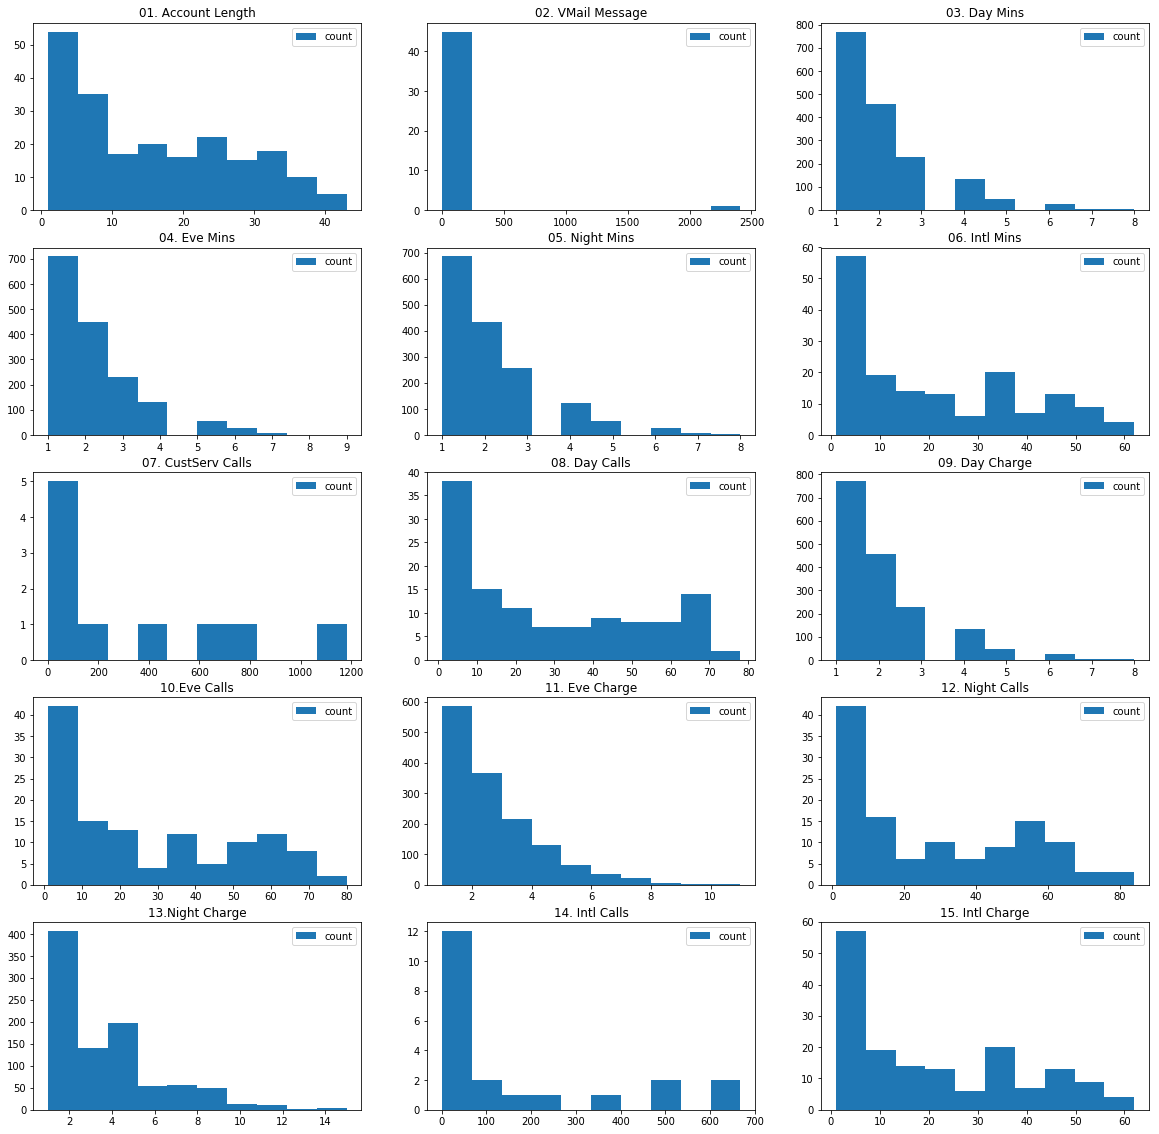

In [16]:
# Histograms for all numeric variables

fig, ax = plt.subplots(nrows=5, ncols=3)
fig.set_size_inches(20, 20)

# First row with 3 columns

hist(ax[0, 0], df.groupBy('Account Length').count().select('count'))
ax[0, 0].set_title('01. Account Length')
ax[0, 0].legend()

hist(ax[0, 1], df.groupBy('VMail Message').count().select('count'))
ax[0, 1].set_title('02. VMail Message')
ax[0, 1].legend()

hist(ax[0, 2], df.groupBy('Day Mins').count().select('count'))
ax[0, 2].set_title('03. Day Mins')
ax[0, 2].legend()

# Second row with 3 columns

hist(ax[1, 0], df.groupBy('Eve Mins').count().select('count'))
ax[1, 0].set_title('04. Eve Mins')
ax[1, 0].legend()

hist(ax[1, 1], df.groupBy('Night Mins').count().select('count'))
ax[1, 1].set_title('05. Night Mins')
ax[1, 1].legend()

hist(ax[1, 2], df.groupBy('Intl Mins').count().select('count'))
ax[1, 2].set_title('06. Intl Mins')
ax[1, 2].legend()

# Third row with 3 columns

hist(ax[2, 0], df.groupBy('CustServ Calls').count().select('count'))
ax[2, 0].set_title('07. CustServ Calls')
ax[2, 0].legend()

hist(ax[2, 1], df.groupBy('Day Calls').count().select('count'))
ax[2, 1].set_title('08. Day Calls')
ax[2, 1].legend()

hist(ax[2, 2], df.groupBy('Day Charge').count().select('count'))
ax[2, 2].set_title('09. Day Charge')
ax[2, 2].legend()

# Fourth row with 3 columns

hist(ax[3, 0], df.groupBy('Eve Calls').count().select('count'))
ax[3, 0].set_title('10.Eve Calls')
ax[3, 0].legend()

hist(ax[3, 1], df.groupBy('Eve Charge').count().select('count'))
ax[3, 1].set_title('11. Eve Charge')
ax[3, 1].legend()

hist(ax[3, 2], df.groupBy('Night Calls').count().select('count'))
ax[3, 2].set_title('12. Night Calls')
ax[3, 2].legend()

# Fifth row with 3 columns

hist(ax[4, 0], df.groupBy('Night Charge').count().select('count'))
ax[4, 0].set_title('13.Night Charge')
ax[4, 0].legend()

hist(ax[4, 1], df.groupBy('Intl Calls').count().select('count'))
ax[4, 1].set_title('14. Intl Calls')
ax[4, 1].legend()

hist(ax[4, 2], df.groupBy('Intl Charge').count().select('count'))
ax[4, 2].set_title('15. Intl Charge')
ax[4, 2].legend()


### Q4. Plot relationship of various variables with churn variable to explore if there is some interaction between them and churn. 

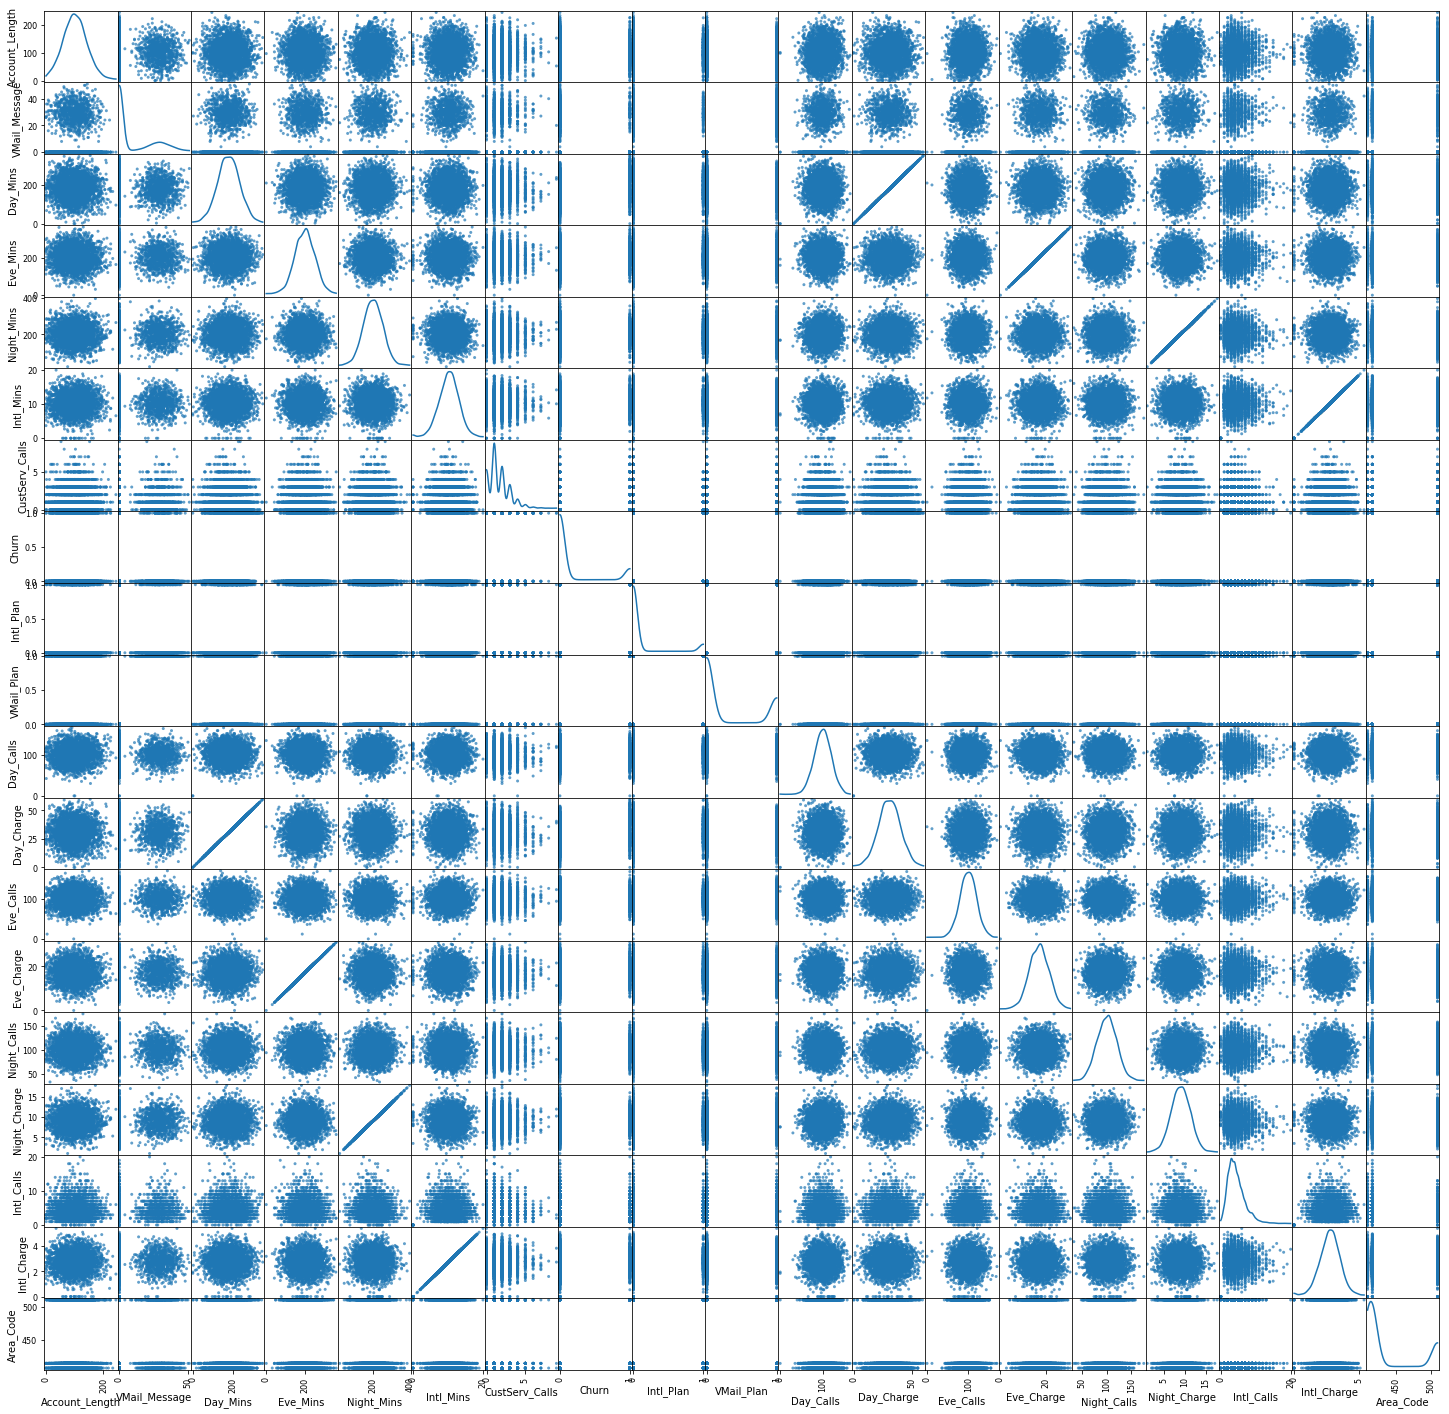

In [17]:
# converting spark-dataframe to pandas-dataframe and plot

data = df.toPandas()
data.columns = ['Account_Length', 'VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Churn', 
                'Intl_Plan', 'VMail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 
                'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code', 'Phone']
data.head()
temp1 = data.drop(['Phone'], axis=1)

from pandas.plotting import scatter_matrix

temp2 = scatter_matrix(temp1, alpha=0.7, figsize=(25, 25), diagonal='kde')

#### Observation:
Most of the independent variables are non-linearly related with the dependent variables

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


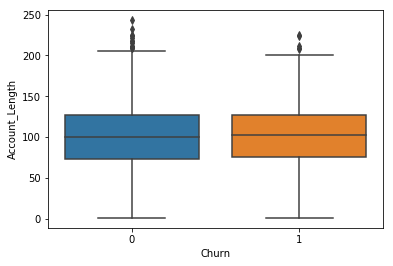

In [18]:
sns.boxplot(x='Churn', y='Account_Length', data=data)

#### Observation:
There are few outliers which need to be treated

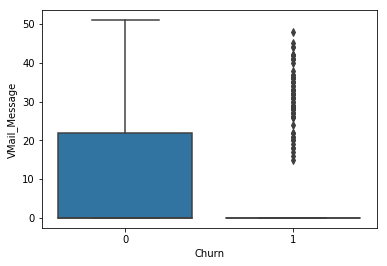

In [19]:
sns.boxplot(x='Churn', y='VMail_Message', data=data)

#### Observation:
There are few outliers which need to be treated

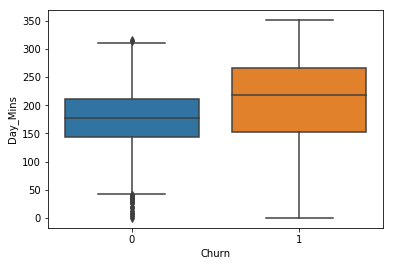

In [20]:
sns.boxplot(x='Churn', y='Day_Mins', data=data)

#### Observation:
There are few outliers which need to be treated

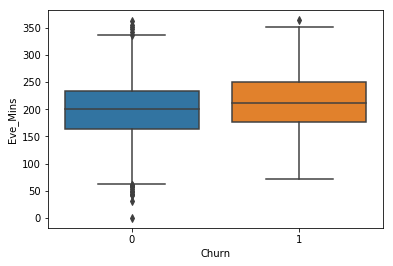

In [21]:
sns.boxplot(x='Churn', y='Eve_Mins', data=data)

#### Observation:
There are few outliers which need to be treated

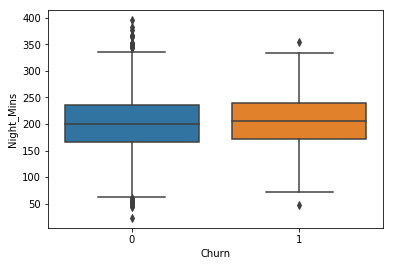

In [22]:
sns.boxplot(x='Churn', y='Night_Mins', data=data)

#### Observation:
There are few outliers which need to be treated

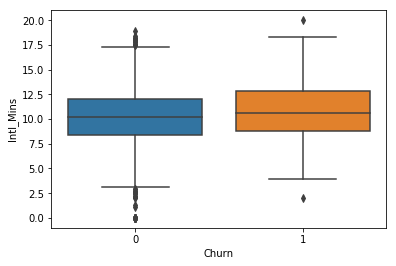

In [23]:
sns.boxplot(x='Churn', y='Intl_Mins', data=data)

#### Observation:
There are few outliers which need to be treated

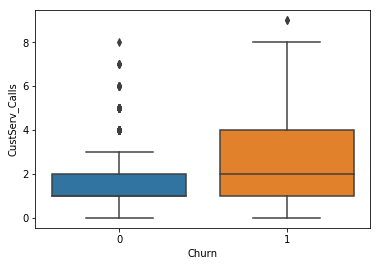

In [24]:
sns.boxplot(x='Churn', y='CustServ_Calls', data=data)

#### Observation:
There are few outliers which need to be treated

In [25]:
# How many customers opted for 'Intl_Plan'

data['Intl_Plan'].value_counts()

0    3010
1     323
Name: Intl_Plan, dtype: int64

#### Observation:

**323 customers opted for 'Intl_Plan' and 3010 customers didn't opt for 'Intl_Plan'**

In [26]:
# Among the customers who opted for 'Intl_Plan' how many churned or not-churned

data[data.Intl_Plan == 1]['Churn'].value_counts()

0    186
1    137
Name: Churn, dtype: int64

#### Observation:

**Among 323 customers who opted for 'Intl_Plan', 137 customers churned**

In [27]:
# Among the customers who did not opt for 'Intl_Plan' how many churned or not-churned

data[data.Intl_Plan == 0]['Churn'].value_counts()

0    2664
1     346
Name: Churn, dtype: int64

#### Observation:

**Among 3010 customers who didn't opt for 'Intl_Plan', 346 customers churned**

In [28]:
# How many customers opted for 'VMail_Plan'

data['VMail_Plan'].value_counts()

0    2411
1     922
Name: VMail_Plan, dtype: int64

#### Observation:

**922 customers opted for 'VMail_Plan' and 2411 customers didn't opt for 'VMail_Plan'**

In [29]:
# Among the customers who opted for 'VMail_Plan' how many churned or not-churned

data[data.VMail_Plan == 1]['Churn'].value_counts()

0    842
1     80
Name: Churn, dtype: int64

#### Observation:

**Among 922 customers who opted for 'VMail_Plan', 80 customers churned**

In [30]:
# Among the customers who did not opt for 'VMail_Plan' how many churned or not-churned

data[data.VMail_Plan == 0]['Churn'].value_counts()

0    2008
1     403
Name: Churn, dtype: int64

#### Observation:

**Among 2411 customers who didn't opt for 'VMail_Plan', 403 customers churned**

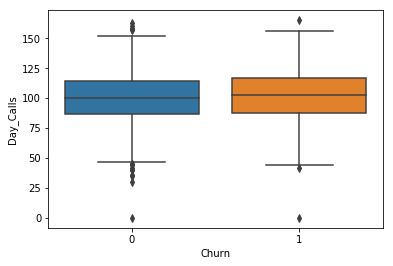

In [31]:
sns.boxplot(x='Churn', y='Day_Calls', data=data)

#### Observation:
There are few outliers which need to be treated

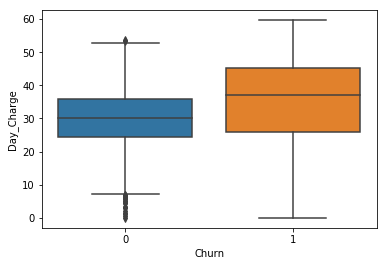

In [32]:
sns.boxplot(x='Churn', y='Day_Charge', data=data)

#### Observation:
There are few outliers which need to be treated

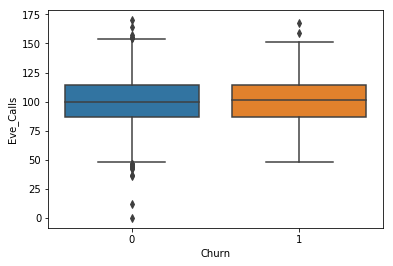

In [33]:
sns.boxplot(x='Churn', y='Eve_Calls', data=data)

#### Observation:
There are few outliers which need to be treated

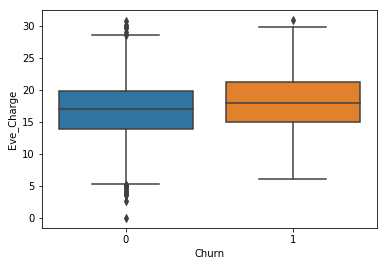

In [34]:
sns.boxplot(x='Churn', y='Eve_Charge', data=data)

#### Observation:
There are few outliers which need to be treated

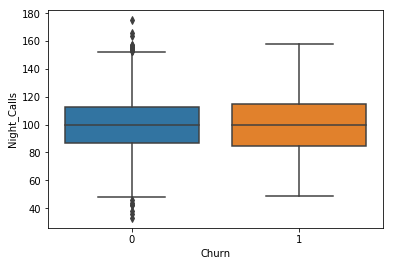

In [35]:
sns.boxplot(x='Churn', y='Night_Calls', data=data)

#### Observation:
There are few outliers which need to be treated

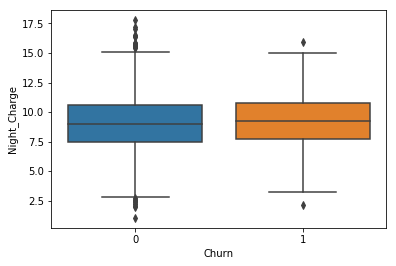

In [36]:
sns.boxplot(x='Churn', y='Night_Charge', data=data)

#### Observation:
There are few outliers which need to be treated

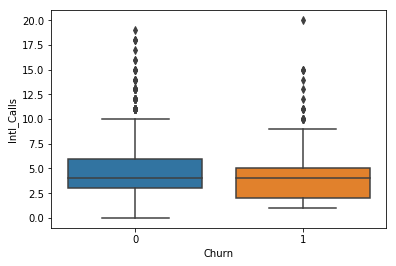

In [37]:
sns.boxplot(x='Churn', y='Intl_Calls', data=data)

#### Observation:
There are few outliers which need to be treated

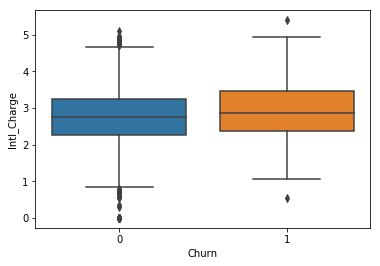

In [38]:
sns.boxplot(x='Churn', y='Intl_Charge', data=data)

#### Observation:
There are few outliers which need to be treated

In [39]:
data['State'].unique()

array([u'KS', u'OH', u'NJ', u'OK', u'AL', u'MA', u'MO', u'LA', u'WV',
       u'IN', u'RI', u'IA', u'MT', u'NY', u'ID', u'VT', u'VA', u'TX',
       u'FL', u'CO', u'AZ', u'SC', u'NE', u'WY', u'HI', u'IL', u'NH',
       u'GA', u'AK', u'MD', u'AR', u'WI', u'OR', u'MI', u'DE', u'UT',
       u'CA', u'MN', u'SD', u'NC', u'WA', u'NM', u'NV', u'DC', u'KY',
       u'ME', u'MS', u'TN', u'PA', u'CT', u'ND'], dtype=object)

/usr/local/anaconda/python2/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

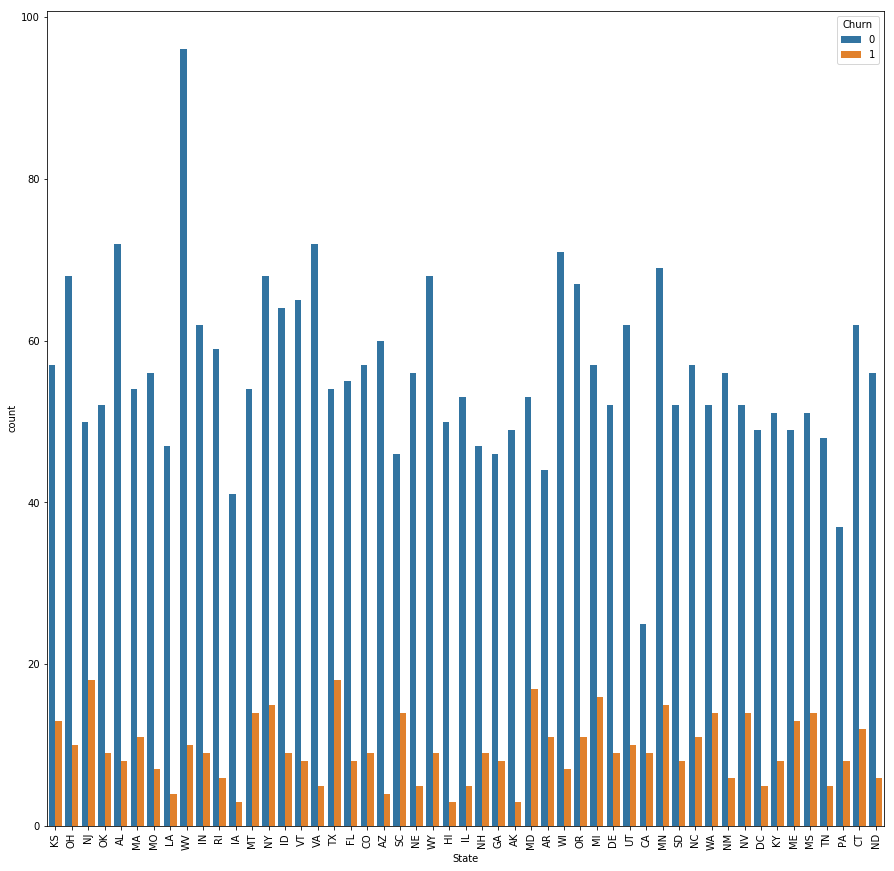

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
ax = sns.countplot(x='State', hue='Churn', data=data)
plt.xticks(rotation=90)

#### Observation:
Highest churn is observed in NJ, TX, MD states

In [41]:
data['Area_Code'].unique()

array([415, 408, 510])

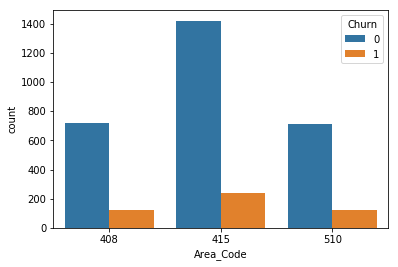

In [42]:
sns.countplot(x='Area_Code', hue='Churn', data=data)

#### Observation:
Area_Code 415 has maximum no. of people who have not churned the service

## Observation:
There are outliers in many numeric variables, which need to treated

### Handling outliers in numeric variables

In [43]:
numeric_vars = ['Account_Length', 'VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls',
                'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge', 'Intl_Calls', 
                'Intl_Charge']
numeric_vars

['Account_Length',
 'VMail_Message',
 'Day_Mins',
 'Eve_Mins',
 'Night_Mins',
 'Intl_Mins',
 'CustServ_Calls',
 'Day_Calls',
 'Day_Charge',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Calls',
 'Night_Charge',
 'Intl_Calls',
 'Intl_Charge']

In [44]:
# Outliers treatment in all numeric variables

def outliers_treatment(name, df):
    
    print '\n\n'
    print 'Independent variable: {}'.format(name)
    print 'Possible LOWER and UPPER boudaries for "{}" variable below or above which are floored and ceiled to these boundaries'.format(name)
    q75, q25 = np.percentile(df[name], [75, 25])
    iqr = q75 - q25
    min_val = q25 - 1.5*iqr
    max_val = q75 + 1.5*iqr
        
    if min_val<0:
        min_val=0        
            
    print 'min_val = {}'.format(min_val)
    print 'max_val = {}'.format(max_val)
    
    new_array = np.array(df[name])    
    new_array[new_array > max_val] = max_val
    new_array[new_array < min_val] = min_val

    df[name] = pd.DataFrame(new_array)       
   
    return df 

name = ''   
for name in numeric_vars:   
    temp = pd.DataFrame()   
    temp = outliers_treatment(name, data)
    data = temp




Independent variable: Account_Length
Possible LOWER and UPPER boudaries for "Account_Length" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 206.5



Independent variable: VMail_Message
Possible LOWER and UPPER boudaries for "VMail_Message" variable below or above which are floored and ceiled to these boundaries
min_val = 0
max_val = 50.0



Independent variable: Day_Mins
Possible LOWER and UPPER boudaries for "Day_Mins" variable below or above which are floored and ceiled to these boundaries
min_val = 34.65
max_val = 325.45



Independent variable: Eve_Mins
Possible LOWER and UPPER boudaries for "Eve_Mins" variable below or above which are floored and ceiled to these boundaries
min_val = 63.55
max_val = 338.35



Independent variable: Night_Mins
Possible LOWER and UPPER boudaries for "Night_Mins" variable below or above which are floored and ceiled to these boundaries
min_val = 64.55
max_val = 337.75



Independent variable: Intl_Mins


### Q5. Calculate correlation of the dependent variable with the independent variables. 

In [45]:
# Check dtat types of all the variables

data.dtypes

Account_Length      int64
VMail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
VMail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

In [46]:
# Convert categorical and nominal variables to numeric variables using Label-encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['le_State'] = le.fit_transform(data['State'])
data['le_Area_Code'] = le.fit_transform(data['Area_Code'])

In [47]:
data.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,VMail_Plan,...,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,le_State,le_Area_Code
0,128,25,265.1,197.40,244.7,10.0,1,0,0,1,...,16.78,91,11.01,3,2.70,KS,415,382-4657,16,1
1,107,26,161.6,195.50,254.4,13.7,1,0,0,1,...,16.62,103,11.45,3,3.70,OH,415,371-7191,35,1
2,137,0,243.4,121.20,162.6,12.2,0,0,0,0,...,10.30,104,7.32,5,3.29,NJ,415,358-1921,31,1
3,84,0,299.4,63.55,196.9,6.6,2,0,1,0,...,5.40,89,8.86,7,1.78,OH,408,375-9999,35,0
4,75,0,166.7,148.30,186.9,10.1,3,0,1,0,...,12.61,121,8.41,3,2.73,OK,415,330-6626,36,1


In [48]:
# Drop 'State', 'Area_Code', 'Phone' variables

final_df = data.drop(['State', 'Area_Code', 'Phone'], axis=1)

"""'final_df' has all the variables including 'le_State', 'le_Area_Code' and excluding 'State', 'Area_Code', 'Phone' variables."""

final_df.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,le_State,le_Area_Code
0,128,25,265.1,197.40,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,16,1
1,107,26,161.6,195.50,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,35,1
2,137,0,243.4,121.20,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,31,1
3,84,0,299.4,63.55,196.9,6.6,2,0,1,0,71,50.90,88,5.40,89,8.86,7,1.78,35,0
4,75,0,166.7,148.30,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,36,1


In [49]:
# Standardise the data

temp = final_df.drop('Churn', axis=1)
temp = temp.apply(lambda x: (x-np.mean(x))/(np.std(x)))

final_std = pd.DataFrame()
final_std = pd.concat([temp, final_df['Churn']], axis=1)
final_std.head()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,le_State,le_Area_Code,Churn
0,0.681270,1.234989,1.575128,-0.071627,0.875492,-0.093573,-0.419423,-0.327580,1.617086,0.479763,1.575396,-0.057253,-0.071441,-0.468006,0.874825,-0.630368,-0.094399,-0.678649,-0.000846,0
1,0.151382,1.308059,-0.336439,-0.109330,1.069062,1.266421,-0.419423,-0.327580,1.617086,1.134225,-0.336715,0.145213,-0.108793,0.149253,1.069958,-0.630368,1.267378,0.603170,-0.000846,0
2,0.908365,-0.591778,1.174346,-1.583717,-0.762868,0.715072,-1.380864,-0.327580,-0.618396,0.681136,1.174505,0.499528,-1.584225,0.200691,-0.761631,0.261784,0.709049,0.333313,-0.000846,0
3,-0.428972,-0.591778,2.208623,-2.727707,-0.078389,-1.343298,0.542019,3.052685,-0.618396,-1.483622,2.208783,-0.614034,-2.728151,-0.570882,-0.078665,1.153936,-1.347234,0.603170,-1.410205,0
4,-0.656067,-0.591778,-0.242246,-1.045953,-0.277945,-0.056817,1.503460,3.052685,-0.618396,0.630793,-0.242196,1.106926,-1.044945,1.075140,-0.278233,-0.630368,-0.053546,0.670634,-0.000846,0


In [50]:
# Correlation among all the variables

final_std.corr()

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,le_State,le_Area_Code,Churn
Account_Length,1.000000,-0.003983,0.007021,-0.006577,-0.009702,0.012540,-0.005582,0.024920,0.003612,0.038604,0.007018,0.018729,-0.006565,-0.013301,-0.009699,0.024383,0.012601,0.003062,-0.015247,0.016253
VMail_Message,-0.003983,1.000000,0.000998,0.017163,0.007660,0.001004,-0.021679,0.008753,0.956956,-0.010271,0.000995,-0.006808,0.017180,0.007091,0.007638,0.009438,0.001014,-0.027739,0.009078,-0.089725
Day_Mins,0.007021,0.000998,1.000000,0.006675,0.003231,-0.011832,-0.006295,0.049078,-0.001364,0.002805,1.000000,0.016910,0.006661,0.023330,0.003205,0.007319,-0.011773,-0.005649,0.010840,0.204788
Eve_Mins,-0.006577,0.017163,0.006675,1.000000,-0.013163,-0.012030,-0.017649,0.018323,0.021118,-0.021350,0.006683,-0.016497,1.000000,0.006642,-0.013185,0.006955,-0.012076,0.014593,0.000342,0.092109
Night_Mins,-0.009702,0.007660,0.003231,-0.013163,1.000000,-0.014236,-0.006858,-0.029411,0.005757,0.022203,0.003231,-0.000851,-0.013170,0.010602,0.999999,-0.004299,-0.014180,0.024391,0.006881,0.036176
Intl_Mins,0.012540,0.001004,-0.011832,-0.012030,-0.014236,1.000000,-0.013779,0.044909,-0.002495,0.021849,-0.011834,0.008145,-0.012038,-0.012457,-0.014244,0.025588,0.999992,-0.007129,0.001226,0.066554
CustServ_Calls,-0.005582,-0.021679,-0.006295,-0.017649,-0.006858,-0.013779,1.000000,-0.029161,-0.025934,-0.021734,-0.006300,-0.003090,-0.017650,-0.009305,-0.006855,-0.001892,-0.013818,-0.022017,0.036641,0.121521
Intl_Plan,0.024920,0.008753,0.049078,0.018323,-0.029411,0.044909,-0.029161,1.000000,0.006006,0.003479,0.049080,0.005629,0.018330,0.012584,-0.029426,0.015181,0.044816,-0.004597,0.044033,0.259852
VMail_Plan,0.003612,0.956956,-0.001364,0.021118,0.005757,-0.002495,-0.025934,0.006006,1.000000,-0.011767,-0.001366,-0.007261,0.021133,0.015638,0.005738,0.002718,-0.002469,-0.031664,0.009875,-0.102148
Day_Calls,0.038604,-0.010271,0.002805,-0.021350,0.022203,0.021849,-0.021734,0.003479,-0.011767,1.000000,0.002808,0.010352,-0.021346,-0.019567,0.022201,0.001992,0.021972,0.001253,-0.006704,0.019735


In [51]:
final_std.corr() > 0.6

,Account_Length,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,le_State,le_Area_Code,Churn
Account_Length,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
VMail_Message,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Day_Mins,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Eve_Mins,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
Night_Mins,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
Intl_Mins,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
CustServ_Calls,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Intl_Plan,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
VMail_Plan,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Day_Calls,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


#### Observation:
Most of the independent variables are non-linearly related with the dependent variable 'Churn'

### Q6. What is your overall conclusion based on the analysis that you just did? ( Use Hypothesis Testing) 

### Hypothesis testing

In [52]:
from scipy import stats


**Hypothesis Test: 'Account_Length' variable**

H0 : The 'Account_Length' of the customer does not impact 'Churn' prediction.

H1 : The 'Account_Length' of the customer does impact 'Churn' prediction.

In [53]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Account_Length'], final_df[final_df.Churn == 0]['Account_Length'])

Ttest_indResult(statistic=0.93814289386525784, pvalue=0.34823899721680185)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'Account_Length' of the customer does not impact 'Churn' prediction.**

**Hypothesis Test: 'VMail_Message' variable**

H0 : The 'VMail_Message' of the customer does not impact 'Churn' prediction.

H1 : The 'VMail_Message' of the customer does impact 'Churn' prediction.

In [54]:
stats.ttest_ind(final_df[final_df.Churn == 1]['VMail_Message'], final_df[final_df.Churn == 0]['VMail_Message'])

Ttest_indResult(statistic=-5.1994356723557527, pvalue=2.1194573305166093e-07)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'VMail_Message' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Day_Mins' variable**

H0 : The 'Day_Mins' of the customer does not impact 'Churn' prediction.

H1 : The 'Day_Mins' of the customer does impact 'Churn' prediction.

In [55]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Day_Mins'], final_df[final_df.Churn == 0]['Day_Mins'])

Ttest_indResult(statistic=12.075193833667472, pvalue=6.8784489135519149e-33)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Day_Mins' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Eve_Mins' variable**

H0 : The 'Eve_Mins' of the customer does not impact 'Churn' prediction.

H1 : The 'Eve_Mins' of the customer does impact 'Churn' prediction.

In [56]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Eve_Mins'], final_df[final_df.Churn == 0]['Eve_Mins'])

Ttest_indResult(statistic=5.3387219544493263, pvalue=9.9873028407788256e-08)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Eve_Mins' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Night_Mins' variable**

H0 : The 'Night_Mins' of the customer does not impact 'Churn' prediction.

H1 : The 'Night_Mins' of the customer does impact 'Churn' prediction.

In [57]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Night_Mins'], final_df[final_df.Churn == 0]['Night_Mins'])

Ttest_indResult(statistic=2.0892491355942688, pvalue=0.036761005828651903)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Night_Mins' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Intl_Mins' variable**

H0 : The 'Intl_Mins' of the customer does not impact 'Churn' prediction.

H1 : The 'Intl_Mins' of the customer does impact 'Churn' prediction.

In [58]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Intl_Mins'], final_df[final_df.Churn == 0]['Intl_Mins'])

Ttest_indResult(statistic=3.8497030467233362, pvalue=0.00012048223491766433)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Intl_Mins' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'CustServ_Calls' variable**

H0 : The 'CustServ_Calls' of the customer does not impact 'Churn' prediction.

H1 : The 'CustServ_Calls' of the customer does impact 'Churn' prediction.

In [59]:
stats.ttest_ind(final_df[final_df.Churn == 1]['CustServ_Calls'], final_df[final_df.Churn == 0]['CustServ_Calls'])

Ttest_indResult(statistic=7.0659282518933404, pvalue=1.9343530192468274e-12)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'CustServ_Calls' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Intl_Plan' variable**

H0 : The 'Intl_Plan' of the customer does not impact 'Churn' prediction.

H1 : The 'Intl_Plan' of the customer does impact 'Churn' prediction.

In [60]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Intl_Plan'], final_df[final_df.Churn == 0]['Intl_Plan'])

Ttest_indResult(statistic=15.530808212120668, pvalue=1.4336058008647604e-52)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Intl_Plan' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'VMail_Plan' variable**

H0 : The 'VMail_Plan' of the customer does not impact 'Churn' prediction.

H1 : The 'VMail_Plan' of the customer does impact 'Churn' prediction.

In [61]:
stats.ttest_ind(final_df[final_df.Churn == 1]['VMail_Plan'], final_df[final_df.Churn == 0]['VMail_Plan'])

Ttest_indResult(statistic=-5.9264613014105949, pvalue=3.4110371159458933e-09)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'VMail_Plan' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Day_Calls' variable**

H0 : The 'Day_Calls' of the customer does not impact 'Churn' prediction.

H1 : The 'Day_Calls' of the customer does impact 'Churn' prediction.

In [62]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Day_Calls'], final_df[final_df.Churn == 0]['Day_Calls'])

Ttest_indResult(statistic=1.1391951122935609, pvalue=0.2547036996474184)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'Day_Calls' of the customer does not impact 'Churn' prediction.**

**Hypothesis Test: 'Day_Charge' variable**

H0 : The 'Day_Charge' of the customer does not impact 'Churn' prediction.

H1 : The 'Day_Charge' of the customer does impact 'Churn' prediction.

In [63]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Day_Charge'], final_df[final_df.Churn == 0]['Day_Charge'])

Ttest_indResult(statistic=12.075253423162472, pvalue=6.8736766369279642e-33)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Day_Charge' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Eve_Calls' variable**

H0 : The 'Eve_Calls' of the customer does not impact 'Churn' prediction.

H1 : The 'Eve_Calls' of the customer does impact 'Churn' prediction.

In [64]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Eve_Calls'], final_df[final_df.Churn == 0]['Eve_Calls'])

Ttest_indResult(statistic=0.46979250511952014, pvalue=0.63853402191114017)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'Eve_Calls' of the customer does not impact 'Churn' prediction.**

**Hypothesis Test: 'Eve_Charge' variable**

H0 : The 'Eve_Charge' of the customer does not impact 'Churn' prediction.

H1 : The 'Eve_Charge' of the customer does impact 'Churn' prediction.

In [65]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Eve_Charge'], final_df[final_df.Churn == 0]['Eve_Charge'])

Ttest_indResult(statistic=5.3382256389734799, pvalue=1.0014441876574668e-07)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Eve_Charge' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Night_Calls' variable**

H0 : The 'Night_Calls' of the customer does not impact 'Churn' prediction.

H1 : The 'Night_Calls' of the customer does impact 'Churn' prediction.

In [66]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Night_Calls'], final_df[final_df.Churn == 0]['Night_Calls'])

Ttest_indResult(statistic=0.35290679664824243, pvalue=0.72418064480025079)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'Night_Calls' of the customer does not impact 'Churn' prediction.**

**Hypothesis Test: 'Night_Charge' variable**

H0 : The 'Night_Charge' of the customer does not impact 'Churn' prediction.

H1 : The 'Night_Charge' of the customer does impact 'Churn' prediction.

In [67]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Night_Charge'], final_df[final_df.Churn == 0]['Night_Charge'])

Ttest_indResult(statistic=2.0894598270283846, pvalue=0.036742040711349858)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Night_Charge' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Intl_Calls' variable**

H0 : The 'Intl_Calls' of the customer does not impact 'Churn' prediction.

H1 : The 'Intl_Calls' of the customer does impact 'Churn' prediction.

In [68]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Intl_Calls'], final_df[final_df.Churn == 0]['Intl_Calls'])

Ttest_indResult(statistic=-3.4853742594282444, pvalue=0.00049779232335161539)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Intl_Calls' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'Intl_Charge' variable**

H0 : The 'Intl_Charge' of the customer does not impact 'Churn' prediction.

H1 : The 'Intl_Charge' of the customer does impact 'Churn' prediction.

In [69]:
stats.ttest_ind(final_df[final_df.Churn == 1]['Intl_Charge'], final_df[final_df.Churn == 0]['Intl_Charge'])

Ttest_indResult(statistic=3.8501848448429317, pvalue=0.00012024652547097065)

#### Observation: 

**Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The 'Intl_Charge' of the customer does impact 'Churn' prediction.**

**Hypothesis Test: 'State' variable** (here using label-encoded 'State' variable 'le_State')

H0 : The 'State' of the customer does not impact 'Churn' prediction.

H1 : The 'State' of the customer does impact 'Churn' prediction.

In [70]:
stats.ttest_ind(final_df[final_df.Churn == 1]['le_State'], final_df[final_df.Churn == 0]['le_State'])

Ttest_indResult(statistic=0.44905297494198249, pvalue=0.65342265497139218)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'State' of the customer does not impact 'Churn' prediction.**

**Hypothesis Test: 'Area_Code' variable** (here using label-encoded 'Area_Code' variable 'le_Area_Code')

H0 : The 'Area_Code' of the customer does not impact 'Churn' prediction.

H1 : The 'Area_Code' of the customer does impact 'Churn' prediction.

In [71]:
stats.ttest_ind(final_df[final_df.Churn == 1]['le_Area_Code'], final_df[final_df.Churn == 0]['le_Area_Code'])

Ttest_indResult(statistic=0.18789367155470296, pvalue=0.85097144840608285)

#### Observation: 

**Here p-value>0.05, so we accept null hypothesis: H0 : The 'Area_Code' of the customer does not impact 'Churn' prediction.**

# Final observations:

### Multi-collinear variables are:

'VMail_Plan' and 'VMail_Message'

'Day_Charge' and 'Day_Mins'

'Eve_Charge' and 'Eve_Mins'

'Night_Charge' and 'Night_Mins'

'Intl_Charge' and 'Intl_Mins


So we can choose either one of them from each pair as independent variable for model building and drop the other

### Hypothesis testing results: Significant variables found are as below: 

'VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'VMail_Plan', 'Day_Charge',
'Eve_Charge', 'Night_Charge', 'Intl_Calls', 'Intl_Charge'



### Considering both the results from above, finally we can use the below IVs for model building

**'VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls'**


## Here most of the independent variables are non-linearly related with the dependent variable 'Churn'. So it would be ideal if we use non-linear kernel SVM classifier, for ex: Gaussian Radial Basis Function known as RBF Kernel in the SVM model for classification.


In [72]:
# final_std is a standardised dataframe

X = final_std[['VMail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls']]
y = final_std['Churn']

In [73]:
X.head()

,VMail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls
0,1.234989,1.575128,-0.071627,0.875492,-0.093573,-0.419423
1,1.308059,-0.336439,-0.109330,1.069062,1.266421,-0.419423
2,-0.591778,1.174346,-1.583717,-0.762868,0.715072,-1.380864
3,-0.591778,2.208623,-2.727707,-0.078389,-1.343298,0.542019
4,-0.591778,-0.242246,-1.045953,-0.277945,-0.056817,1.503460


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [75]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

non-linear kernel SVM classifier accuracy = 0.906


[Text(0,0.5,u'0'), Text(0,1.5,u'1')]

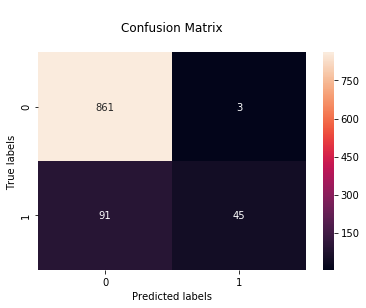

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm = SVC(kernel='rbf', random_state=0)
svm.fit(X_train, y_train)
accuracy = svm.score(X_test, y_test)
print 'non-linear kernel SVM classifier accuracy = {}'.format(round(accuracy, 3))
 
predicted = svm.predict(X_test)
cm = confusion_matrix(y_test, predicted)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1']) 
